Original class distribution:
target
0    0.894543
1    0.105457
Name: proportion, dtype: float64

After SMOTE class distribution:
target
0    0.5
1    0.5
Name: proportion, dtype: float64

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     12151
           1       0.96      0.98      0.97     12150

    accuracy                           0.97     24301
   macro avg       0.97      0.97      0.97     24301
weighted avg       0.97      0.97      0.97     24301



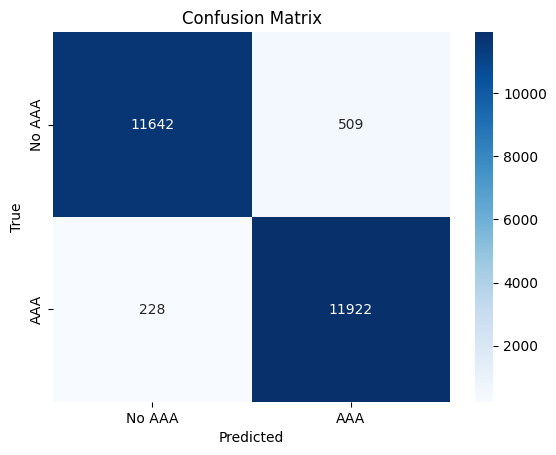

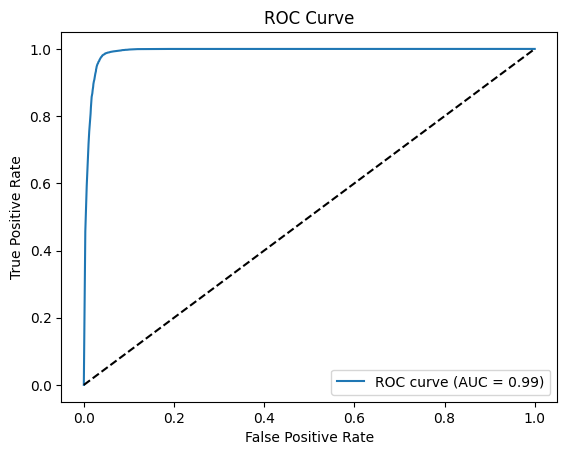

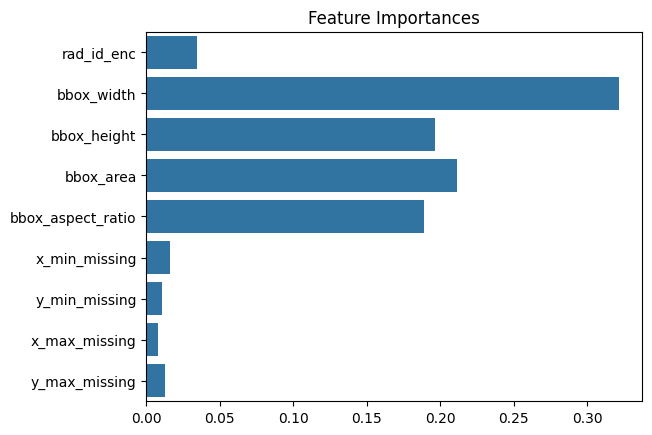

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE  # install with `pip install imblearn`

# 1. Load dataset
df = pd.read_csv('train.csv')  # Replace with your CSV file path

# 2. Create binary target for 'Aortic enlargement'
df['target'] = (df['class_name'] == 'Aortic enlargement').astype(int)

# 3. Handle missing bounding box values:
bbox_cols = ['x_min', 'y_min', 'x_max', 'y_max']
for col in bbox_cols:
    df[f'{col}_missing'] = df[col].isna().astype(int)  # flag missingness
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# 4. Create bounding box features
df['bbox_width'] = df['x_max'] - df['x_min']
df['bbox_height'] = df['y_max'] - df['y_min']
df['bbox_area'] = df['bbox_width'] * df['bbox_height']
df['bbox_aspect_ratio'] = df['bbox_width'] / (df['bbox_height'] + 1e-6)  # avoid div by zero

# 5. Encode categorical radiologist ID
df['rad_id_enc'] = df['rad_id'].astype('category').cat.codes

# 6. Define features and target
feature_cols = ['rad_id_enc', 'bbox_width', 'bbox_height', 'bbox_area', 'bbox_aspect_ratio'] + [f'{c}_missing' for c in bbox_cols]
X = df[feature_cols]
y = df['target']

# 7. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Check and handle class imbalance with SMOTE
print("Original class distribution:")
print(y.value_counts(normalize=True))

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

print("\nAfter SMOTE class distribution:")
print(pd.Series(y_res).value_counts(normalize=True))

# 9. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# 10. Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 11. Predictions and evaluation
y_pred = clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 12. Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No AAA', 'AAA'], yticklabels=['No AAA', 'AAA'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 13. ROC curve and AUC
y_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 14. Feature importance plot
importances = clf.feature_importances_
sns.barplot(x=importances, y=feature_cols)
plt.title('Feature Importances')
plt.show()


Total data samples: 67914
Total 'No finding' samples: 31818
Total 'Aortic enlargement' samples: 7162

Original class distribution:
target
0    60752
1     7162
Name: count, dtype: int64
target
0    0.894543
1    0.105457
Name: proportion, dtype: float64

After SMOTE:
Total samples: 121504
target
0    60752
1    60752
Name: count, dtype: int64
target
0    0.5
1    0.5
Name: proportion, dtype: float64

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     12151
           1       0.96      0.98      0.97     12150

    accuracy                           0.97     24301
   macro avg       0.97      0.97      0.97     24301
weighted avg       0.97      0.97      0.97     24301



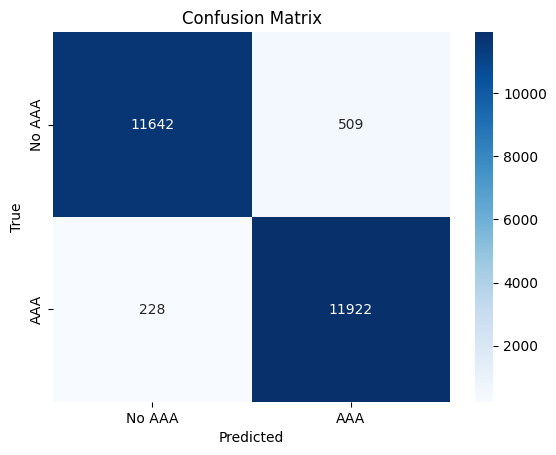

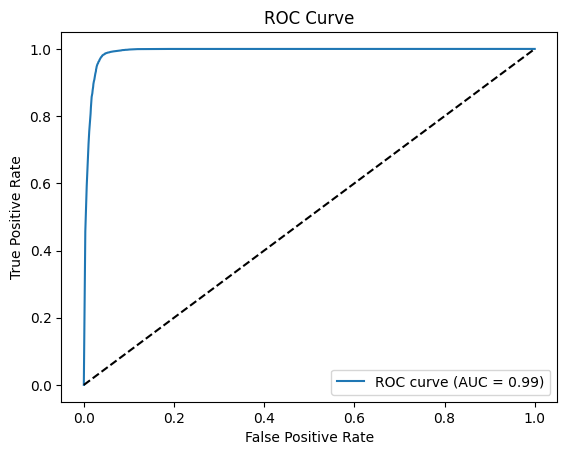

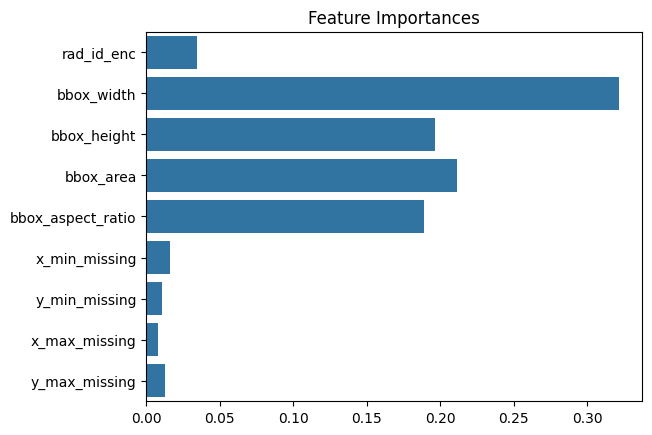

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE  # install with `pip install imblearn`

# 1. Load dataset
df = pd.read_csv('train.csv')  # Replace with your CSV file path

# Print total rows and class counts before processing
print(f"Total data samples: {len(df)}")
print(f"Total 'No finding' samples: {(df['class_name'] == 'No finding').sum()}")
print(f"Total 'Aortic enlargement' samples: {(df['class_name'] == 'Aortic enlargement').sum()}")

# 2. Create binary target for 'Aortic enlargement'
df['target'] = (df['class_name'] == 'Aortic enlargement').astype(int)

# 3. Handle missing bounding box values:
bbox_cols = ['x_min', 'y_min', 'x_max', 'y_max']
for col in bbox_cols:
    df[f'{col}_missing'] = df[col].isna().astype(int)  # flag missingness
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# 4. Create bounding box features
df['bbox_width'] = df['x_max'] - df['x_min']
df['bbox_height'] = df['y_max'] - df['y_min']
df['bbox_area'] = df['bbox_width'] * df['bbox_height']
df['bbox_aspect_ratio'] = df['bbox_width'] / (df['bbox_height'] + 1e-6)  # avoid div by zero

# 5. Encode categorical radiologist ID
df['rad_id_enc'] = df['rad_id'].astype('category').cat.codes

# 6. Define features and target
feature_cols = ['rad_id_enc', 'bbox_width', 'bbox_height', 'bbox_area', 'bbox_aspect_ratio'] + [f'{c}_missing' for c in bbox_cols]
X = df[feature_cols]
y = df['target']

# 7. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Check and handle class imbalance with SMOTE
print("\nOriginal class distribution:")
print(y.value_counts())
print(y.value_counts(normalize=True))

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

print("\nAfter SMOTE:")
print(f"Total samples: {len(y_res)}")
print(y_res.value_counts())
print(y_res.value_counts(normalize=True))

# 9. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# 10. Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 11. Predictions and evaluation
y_pred = clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 12. Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No AAA', 'AAA'], yticklabels=['No AAA', 'AAA'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 13. ROC curve and AUC
y_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 14. Feature importance plot
importances = clf.feature_importances_
sns.barplot(x=importances, y=feature_cols)
plt.title('Feature Importances')
plt.show()


Total data samples: 67914
Total 'No finding' samples: 31818
Total 'Aortic enlargement' samples: 7162

Original class distribution:
target
0    60752
1     7162
Name: count, dtype: int64
target
0    0.894543
1    0.105457
Name: proportion, dtype: float64

After SMOTE:
Total samples: 121504
target
0    60752
1    60752
Name: count, dtype: int64
target
0    0.5
1    0.5
Name: proportion, dtype: float64

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93     12151
           1       0.91      0.97      0.94     12150

    accuracy                           0.94     24301
   macro avg       0.94      0.94      0.94     24301
weighted avg       0.94      0.94      0.94     24301



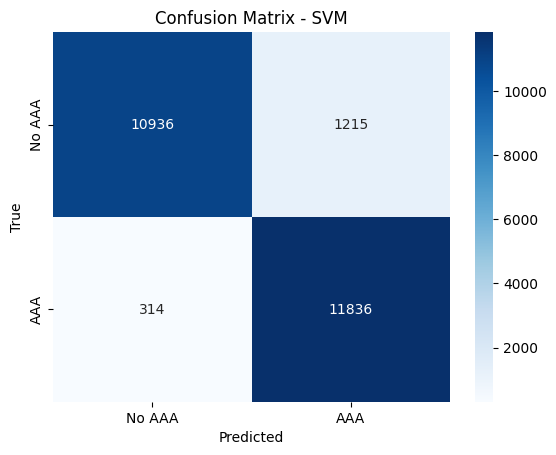

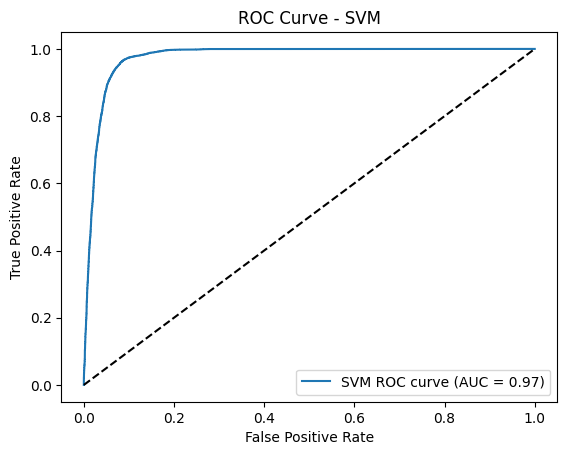

In [2]:
# SVM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('train.csv')

# Print total samples and class counts
print(f"Total data samples: {len(df)}")
print(f"Total 'No finding' samples: {(df['class_name'] == 'No finding').sum()}")
print(f"Total 'Aortic enlargement' samples: {(df['class_name'] == 'Aortic enlargement').sum()}")

# Binary target
df['target'] = (df['class_name'] == 'Aortic enlargement').astype(int)

# Handle missing bounding boxes
bbox_cols = ['x_min', 'y_min', 'x_max', 'y_max']
for col in bbox_cols:
    df[f'{col}_missing'] = df[col].isna().astype(int)
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Bounding box features
df['bbox_width'] = df['x_max'] - df['x_min']
df['bbox_height'] = df['y_max'] - df['y_min']
df['bbox_area'] = df['bbox_width'] * df['bbox_height']
df['bbox_aspect_ratio'] = df['bbox_width'] / (df['bbox_height'] + 1e-6)

# Encode rad_id
df['rad_id_enc'] = df['rad_id'].astype('category').cat.codes

# Features and target
feature_cols = ['rad_id_enc', 'bbox_width', 'bbox_height', 'bbox_area', 'bbox_aspect_ratio'] + [f'{c}_missing' for c in bbox_cols]
X = df[feature_cols]
y = df['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance with SMOTE
print("\nOriginal class distribution:")
print(y.value_counts())
print(y.value_counts(normalize=True))

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

print("\nAfter SMOTE:")
print(f"Total samples: {len(y_res)}")
print(y_res.value_counts())
print(y_res.value_counts(normalize=True))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Train SVM classifier (with probability=True for ROC)
clf = SVC(kernel='rbf', probability=True, random_state=42)
clf.fit(X_train, y_train)

# Predict & Evaluate
y_pred = clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No AAA', 'AAA'], yticklabels=['No AAA', 'AAA'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()

# ROC curve and AUC
y_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'SVM ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()


Total data samples: 67914
Total 'No finding' samples: 31818
Total 'Aortic enlargement' samples: 7162

Original class distribution:
target
0    60752
1     7162
Name: count, dtype: int64
target
0    0.894543
1    0.105457
Name: proportion, dtype: float64

After SMOTE:
Total samples: 121504
target
0    60752
1    60752
Name: count, dtype: int64
target
0    0.5
1    0.5
Name: proportion, dtype: float64

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     12151
           1       0.96      0.96      0.96     12150

    accuracy                           0.96     24301
   macro avg       0.96      0.96      0.96     24301
weighted avg       0.96      0.96      0.96     24301



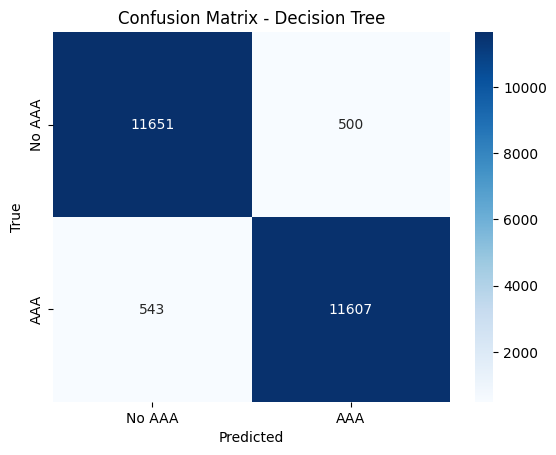

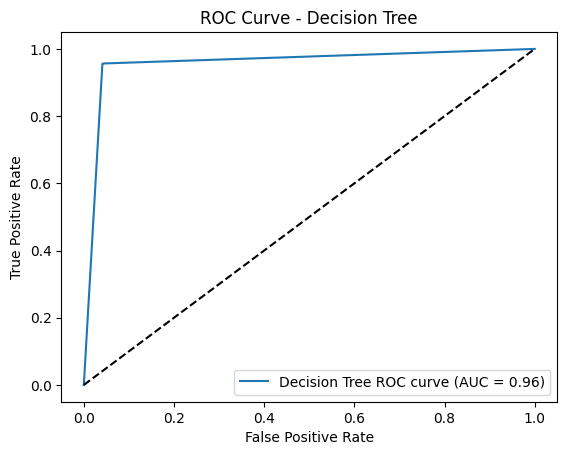

In [1]:
# Decision Treee
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('train.csv')

# Print total samples and class counts
print(f"Total data samples: {len(df)}")
print(f"Total 'No finding' samples: {(df['class_name'] == 'No finding').sum()}")
print(f"Total 'Aortic enlargement' samples: {(df['class_name'] == 'Aortic enlargement').sum()}")

# Binary target
df['target'] = (df['class_name'] == 'Aortic enlargement').astype(int)

# Handle missing bounding boxes
bbox_cols = ['x_min', 'y_min', 'x_max', 'y_max']
for col in bbox_cols:
    df[f'{col}_missing'] = df[col].isna().astype(int)
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Bounding box features
df['bbox_width'] = df['x_max'] - df['x_min']
df['bbox_height'] = df['y_max'] - df['y_min']
df['bbox_area'] = df['bbox_width'] * df['bbox_height']
df['bbox_aspect_ratio'] = df['bbox_width'] / (df['bbox_height'] + 1e-6)

# Encode rad_id
df['rad_id_enc'] = df['rad_id'].astype('category').cat.codes

# Features and target
feature_cols = ['rad_id_enc', 'bbox_width', 'bbox_height', 'bbox_area', 'bbox_aspect_ratio'] + [f'{c}_missing' for c in bbox_cols]
X = df[feature_cols]
y = df['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance with SMOTE
print("\nOriginal class distribution:")
print(y.value_counts())
print(y.value_counts(normalize=True))

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

print("\nAfter SMOTE:")
print(f"Total samples: {len(y_res)}")
print(y_res.value_counts())
print(y_res.value_counts(normalize=True))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Train Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict & Evaluate
y_pred = clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No AAA', 'AAA'], yticklabels=['No AAA', 'AAA'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# ROC curve and AUC
y_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Decision Tree ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()
